In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv('/content/car data.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(car.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [5]:
duplicate_value=car[car.duplicated()]
print("Number of Duplicate Row:",duplicate_value.shape)

Number of Duplicate Row: (2, 9)


In [6]:
car = car.drop(['Car_Name','Owner'], axis=1)

In [7]:
car.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


LinearRegression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
x=car[['Year','Present_Price','Driven_kms','Fuel_Type','Transmission']]
y=car['Selling_Price']

In [10]:
#convert categorical variables to dummy variables
car.columns=car.columns.str.strip()
x=car[['Year','Present_Price','Driven_kms','Fuel_Type','Transmission']]
x=pd.get_dummies(x,drop_first=True)
print(x.columns)

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(x_test)

In [14]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MEAN ABSOLUTE ERROR:",mae)
print("MEAN SQUARED ERROR:",mse)
print("ROOT MEAN SQUARED ERROR:",rmse)
print("R2 SCORE:",r2)

MEAN ABSOLUTE ERROR: 1.2797264732389109
MEAN SQUARED ERROR: 3.388608433738548
ROOT MEAN SQUARED ERROR: 1.8408173276396949
R2 SCORE: 0.8528967897144617


In [15]:
print("\nEnter Car Details to Predict Price\n")

year = int(input("Enter Year of Manufacture (e.g., 2018): "))
present_price = float(input("Enter Present Price (in lakhs): "))
driven_kms = int(input("Enter Driven Kilometers: "))

fuel_type = input("Enter Fuel Type (Petrol/Diesel/CNG): ").strip().capitalize()
selling_type = input("Enter Selling Type (Dealer/Individual): ").strip().capitalize()
transmission = input("Enter Transmission Type (Manual/Automatic): ").strip().capitalize()
new_data = pd.DataFrame({
    'Year': [year],
    'Present_Price': [present_price],
    'Driven_kms': [driven_kms],
    'Fuel_Type_Diesel': [1 if fuel_type == 'Diesel' else 0],
    'Fuel_Type_Petrol': [1 if fuel_type == 'Petrol' else 0],
    'Transmission_Manual': [1 if transmission == 'Manual' else 0]
})
new_data = new_data[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual']]
predicted_price = model.predict(new_data)
print("\n----------------------------------------")
print(f"Predicted Selling Price: ₹{round(predicted_price[0], 2)} lakhs")
print("----------------------------------------")


Enter Car Details to Predict Price

Enter Year of Manufacture (e.g., 2018): 2014
Enter Present Price (in lakhs): 5.59
Enter Driven Kilometers: 270000
Enter Fuel Type (Petrol/Diesel/CNG): petrol
Enter Selling Type (Dealer/Individual): Dealer
Enter Transmission Type (Manual/Automatic): Manual

----------------------------------------
Predicted Selling Price: ₹2.06 lakhs
----------------------------------------


RandomForestRegressor

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [18]:
car.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [19]:
target_col = 'Selling_Price'  # name of target column
numeric_features = ['Year','Present_Price','Driven_kms']
categorical_features = ['Fuel_Type','Selling_type','Transmission']

In [20]:
car = car.dropna(subset=[target_col]).reset_index(drop=True)
X = car.drop(columns=[target_col])
y = np.log1p(car[target_col].values)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('scale', StandardScaler())])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, categorical_features)
], remainder='drop')


In [23]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
pipeline = Pipeline([('preproc', preprocessor), ('rf', rf)])

In [24]:
num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('scale', StandardScaler())])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, categorical_features)
], remainder='drop')

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
pipeline = Pipeline([('preproc', preprocessor), ('rf', rf)])

pipeline.set_params(rf__n_estimators=100)
pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
y_test_pred_inv = np.expm1(y_pred_test)
y_test_inv = np.expm1(y_test)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

print("Test RMSE (orig scale):", rmse(y_test_inv, y_test_pred_inv))
print("Test R2 (log-target):", r2_score(y_test, pipeline.predict(X_test)))

Test RMSE (orig scale): 0.9794627635859261
Test R2 (log-target): 0.9701645666302037


In [31]:
param_dist = {
    'rf__n_estimators': [100,200,400],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2,5,10],
    'rf__min_samples_leaf': [1,2,4],
    'rf__max_features': ['sqrt',0.5] # Changed 'auto' to 'sqrt'
}

search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                            n_iter=20, cv=3, scoring='neg_root_mean_squared_error',
                            random_state=42, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
best_model = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'rf__n_estimators': 400, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 0.5, 'rf__max_depth': None}


In [26]:
y_pred_best = best_model.predict(X_test)
y_pred_best_inv = np.expm1(y_pred_best)

print("Final Test RMSE (orig scale):", rmse(y_test_inv, y_pred_best_inv))
print("Final Test R2 (log-target):", r2_score(y_test, best_model.predict(X_test)))

Final Test RMSE (orig scale): 1.1045487982943025
Final Test R2 (log-target): 0.9696736010980792


In [27]:
ohe = best_model.named_steps['preproc'].named_transformers_['cat'].named_steps['ohe']
cat_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + cat_names

importances = best_model.named_steps['rf'].feature_importances_
imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(imp_series.head(10))

Present_Price              0.581607
Selling_type_Individual    0.172563
Selling_type_Dealer        0.108733
Year                       0.039823
Fuel_Type_Diesel           0.035582
Driven_kms                 0.025339
Fuel_Type_Petrol           0.015396
Transmission_Automatic     0.010718
Transmission_Manual        0.010223
Fuel_Type_CNG              0.000017
dtype: float64


In [28]:
new_car = pd.DataFrame([{
    'Year':2014,'Present_Price' :6.87, 'Driven_kms':42450,'Fuel_Type':'Petrol',
    'Selling_type':'Dealer', 'Transmission':'Manual'
}])

pred_log = best_model.predict(new_car)
pred_price = np.expm1(pred_log)[0]
print("Predicted price:", pred_price)

Predicted price: 4.287861065077938


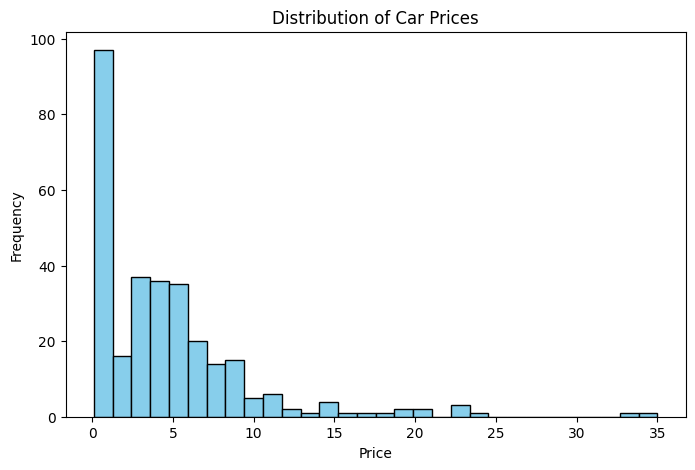

In [29]:
plt.figure(figsize=(8,5))
plt.hist(car['Selling_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

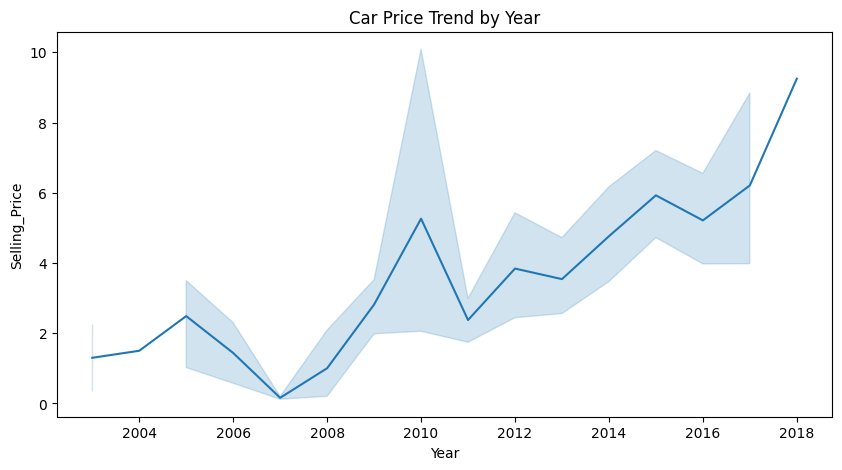

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Selling_Price', data=car)
plt.title('Car Price Trend by Year')
plt.show()